In [14]:
%load_ext autoreload
%autoreload 2
%load_ext jupyter_black

# Training Model

In [15]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Load the preprocessed data
data = np.load("../data/preprocessed_data.npz")
X_train, X_valid, X_test, y_train, y_valid, y_test = (
    data["X_train"],
    data["X_valid"],
    data["X_test"],
    data["y_train"],
    data["y_valid"],
    data["y_test"],
)

# Define the CNN model
model = models.Sequential()
# Convolutional layers
model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))

# Fully connected layers
model.add(layers.Flatten())
model.add(layers.Dense(128, activation="relu"))
model.add(
    layers.Dense(3, activation="softmax")
)  # Assuming 3 classes (adidas, fila, social)


# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Set up data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest",
)


early_stopping = EarlyStopping(
    monitor="val_loss", patience=5, restore_best_weights=True
)

# Train the model
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    epochs=30,
    validation_data=(X_valid, y_valid),
    callbacks=[early_stopping],
    verbose=1,
)

Epoch 1/30
8/8 [==============================] - 3s 327ms/step - loss: 5.9837 - accuracy: 0.3186 - val_loss: 1.5363 - val_accuracy: 0.3571
Epoch 2/30
8/8 [==============================] - 3s 305ms/step - loss: 1.1730 - accuracy: 0.3496 - val_loss: 1.0998 - val_accuracy: 0.3214
Epoch 3/30
8/8 [==============================] - 3s 345ms/step - loss: 1.1192 - accuracy: 0.3230 - val_loss: 1.0949 - val_accuracy: 0.3929
Epoch 4/30
8/8 [==============================] - 3s 345ms/step - loss: 1.0945 - accuracy: 0.3496 - val_loss: 1.0862 - val_accuracy: 0.3571
Epoch 5/30
8/8 [==============================] - 3s 299ms/step - loss: 1.0848 - accuracy: 0.4248 - val_loss: 1.1011 - val_accuracy: 0.3214
Epoch 6/30
8/8 [==============================] - 3s 304ms/step - loss: 1.0910 - accuracy: 0.4336 - val_loss: 1.0308 - val_accuracy: 0.6429
Epoch 7/30
8/8 [==============================] - 2s 337ms/step - loss: 1.0813 - accuracy: 0.4425 - val_loss: 0.9868 - val_accuracy: 0.6071
Epoch 8/30
8/8 [====

Text(0, 0.5, 'Loss')

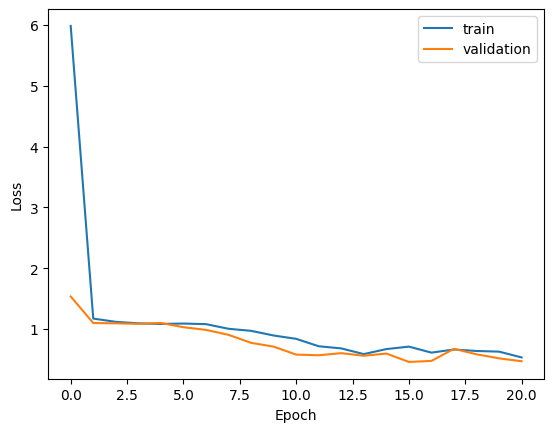

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="validation")
plt.legend()

plt.xlabel("Epoch")
plt.ylabel("Loss")

In [17]:
class_names = ["adidas", "fila", "social"]

1/1 [==============================] - 0s 85ms/step
Accuracy: 86.21%
F1 Score: 0.8525
Recall: 0.8621


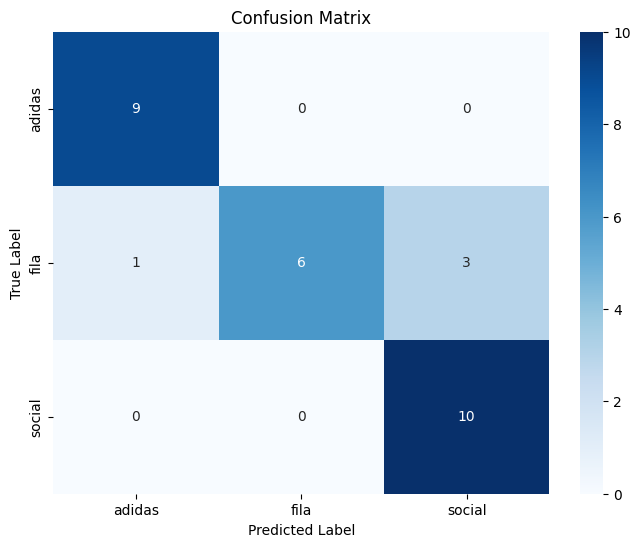

Classification Report:
               precision    recall  f1-score   support

      adidas       0.90      1.00      0.95         9
        fila       1.00      0.60      0.75        10
      social       0.77      1.00      0.87        10

    accuracy                           0.86        29
   macro avg       0.89      0.87      0.86        29
weighted avg       0.89      0.86      0.85        29

1/1 [==============================] - 0s 24ms/step


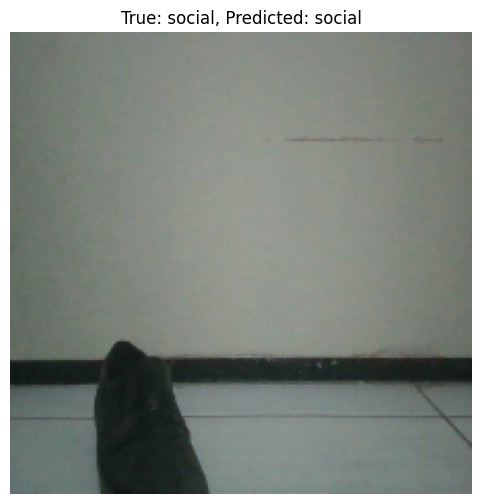

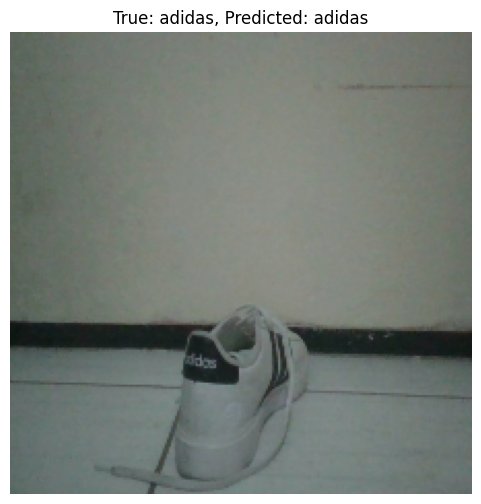

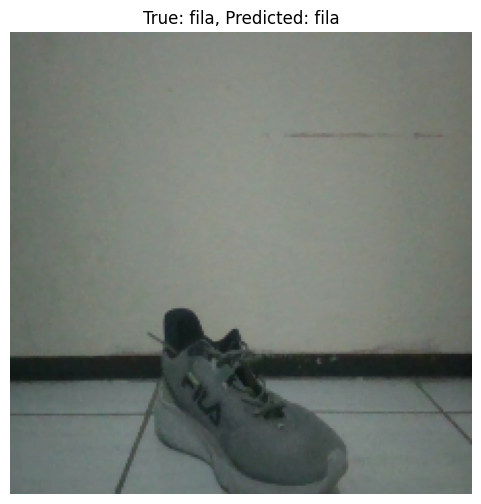

In [18]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    f1_score,
    recall_score,
)
import seaborn as sns
import matplotlib.pyplot as plt


def load_preprocessed_data(file_path="../data/preprocessed_data.npz"):
    data = np.load(file_path)
    X_test, y_test = data["X_test"], data["y_test"]
    return X_test, y_test


def load_trained_model(model_path="model.h5"):
    return tf.keras.models.load_model(model_path)


def evaluate_model(model, X_test, y_test):
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_test, axis=1)

    # Calculate metrics
    accuracy = accuracy_score(y_true_classes, y_pred_classes)
    f1 = f1_score(y_true_classes, y_pred_classes, average="weighted")
    recall = recall_score(y_true_classes, y_pred_classes, average="weighted")

    # Generate confusion matrix
    conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

    # Generate classification report
    class_names = ["adidas", "fila", "social"]
    classification_rep = classification_report(
        y_true_classes, y_pred_classes, target_names=class_names
    )

    return accuracy, f1, recall, conf_matrix, classification_rep


def plot_confusion_matrix(conf_matrix):
    plt.figure(figsize=(8, 6))
    sns.heatmap(
        conf_matrix,
        annot=True,
        fmt="d",
        cmap="Blues",
        xticklabels=["adidas", "fila", "social"],
        yticklabels=["adidas", "fila", "social"],
    )
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()


def example_predictions(model, X_test, y_test, num_examples=3):
    # Randomly select examples from the test set
    random_indices = np.random.choice(len(X_test), size=num_examples, replace=False)
    example_images = X_test[random_indices]
    example_labels_true = np.argmax(y_test[random_indices], axis=1)

    # Predict labels for the examples
    example_labels_pred = np.argmax(model.predict(example_images), axis=1)

    # Display example images with true and predicted labels
    for i in range(num_examples):
        plt.figure(figsize=(6, 6))
        plt.imshow(example_images[i])
        plt.title(
            f"True: {class_names[example_labels_true[i]]}, Predicted: {class_names[example_labels_pred[i]]}"
        )
        plt.axis("off")
        plt.show()


if __name__ == "__main__":
    # Evaluate the model
    accuracy, f1, recall, conf_matrix, classification_rep = evaluate_model(
        model, X_test, y_test
    )

    # Print metrics
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"F1 Score: {f1:.4f}")
    print(f"Recall: {recall:.4f}")

    # Plot confusion matrix
    plot_confusion_matrix(conf_matrix)

    # Print classification report
    print("Classification Report:\n", classification_rep)

    # Display example predictions
    example_predictions(model, X_test, y_test)

In [19]:
# save model as image visualizatoin

In [13]:
model_image = tf.keras.utils.plot_model( model, to_file='model.png', show_shapes=True, show_layer_names=True)